#Predicao PMS

Este trabalho tem como objetivo a predicao da PMS - Pesquisa Mensal de Serviços . Os dados serao reirados do IBGE com o pacote sidrapy. Como regressores serao feitas pesquisas no google trend por palavras chaves que podem influenciar o setor de servicos.



In [ ]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 KB 2.9 MB/s eta 0:00:00
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.2.0
    Uninstalling xlrd-1.2.0:
      Successfully uninstalled xlrd-1.2.0


In [ ]:
!pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 40.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [ ]:
!pip install python-bcb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 5.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1


In [ ]:
!pip install pmdarima
##Solucao https://blog.csdn.net/qq_49821869/article/details/128540436
import os
os.kill(os.getpid(),9)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 61.0 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


#Importar bibbliotecas

In [1]:
!pip install sidrapy
import sidrapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from pmdarima import arima
import plotly.express as ploty
from datetime import datetime
from datetime import timedelta
import plotly.express as px
import plotly.graph_objs as go
import random

In [ ]:
##Biblioteca para permitir que o colab acesse o google drive 
#https://www.youtube.com/watch?v=yl2WiFbZhPs
import sys
sys.path.insert(0,'/content/drive/MyDrive/Colab Notebooks/Funcoes_criadas')

In [ ]:
## testes de aderencia e estacionaridades
#https://www.statsmodels.org/dev/examples/notebooks/generated/stationarity_detrending_adf_kpss.html
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [ ]:
%matplotlib inline
sns.set(rc={'figure.figsize':(20,10)})

In [ ]:
##Salvar as dependencias deste projeto
#!pip freeze > requirements.txt
##Importando
#!pip install -r requirements.txt

#Importando dados

##Dados PMS
https://sidra.ibge.gov.br/tabela/6443

Codigo:/t/6443/n1/all/v/8677/p/all/c11046/40312/c12355/107071/d/v8677%201




In [2]:
#Nao retornou nenhum valor 
pms_raw = sidrapy.get_table(table_code = '6443',
                             territorial_level = '1',
                             ibge_territorial_code = 'all',
                             variable = '8677',
                             period = 'all')

In [ ]:
# Detectar a codificação do arquivo
import chardet
with open('/content/dados_pms.csv', 'rb') as f:
    result = chardet.detect(f.read())

In [ ]:
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [ ]:
pms_raw = pd.read_csv('/content/dados_pms.csv',encoding=result['encoding'])
pms_raw

,Unnamed: 0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Mês (Código),Mês,Variável (Código),Variável,Tipos de índice (Código),Tipos de índice
0,2,1,Brasil,30,Número-índice,71.28816,1,Brasil,201101,janeiro 2011,11621,PMS - Número-índice (2014=100),56725,Índice de receita nominal de serviços
1,3,1,Brasil,30,Número-índice,83.81007,1,Brasil,201101,janeiro 2011,11621,PMS - Número-índice (2014=100),56726,Índice de volume de serviços
2,4,1,Brasil,30,Número-índice,71.26033,1,Brasil,201102,fevereiro 2011,11621,PMS - Número-índice (2014=100),56725,Índice de receita nominal de serviços
3,5,1,Brasil,30,Número-índice,83.26321,1,Brasil,201102,fevereiro 2011,11621,PMS - Número-índice (2014=100),56726,Índice de volume de serviços
4,6,1,Brasil,30,Número-índice,76.19429,1,Brasil,201103,março 2011,11621,PMS - Número-índice (2014=100),56725,Índice de receita nominal de serviços
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,283,1,Brasil,30,Número-índice,102.94203,1,Brasil,202209,setembro 2022,11621,PMS - Número-índice (2014=100),56726,Índice de volume de serviços
282,284,1,Brasil,30,Número-índice,142.05129,1,Brasil,202210,outubro 2022,11621,PMS - Número-índice (2014=100),56725,Índice de receita nominal de serviços
283,285,1,Brasil,30,Número-índice,102.20084,1,Brasil,202210,outubro 2022,11621,PMS - Número-índice (2014=100),56726,Índice de volume de serviços
284,286,1,Brasil,30,Número-índice,143.48816,1,Brasil,202211,novembro 2022,11621,PMS - Número-índice (2014=100),56725,Índice de receita nominal de serviços


In [ ]:
pms_raw = pms_raw.loc[pms_raw['Tipos de índice (Código)'] == 56725]

In [ ]:
from datetime import datetime

In [ ]:
pms_raw.index = pms_raw['Mês (Código)'].apply(lambda x: datetime.strptime(str(x), "%Y%m"))

In [ ]:
pms_raw.tail()

,Unnamed: 0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Mês (Código),Mês,Variável (Código),Variável,Tipos de índice (Código),Tipos de índice
Mês (Código),,,,,,,,,,,,,,
2022-07-01,278,1,Brasil,30,Número-índice,139.32229,1,Brasil,202207,julho 2022,11621,PMS - Número-índice (2014=100),56725,Índice de receita nominal de serviços
2022-08-01,280,1,Brasil,30,Número-índice,142.80890,1,Brasil,202208,agosto 2022,11621,PMS - Número-índice (2014=100),56725,Índice de receita nominal de serviços
2022-09-01,282,1,Brasil,30,Número-índice,141.53394,1,Brasil,202209,setembro 2022,11621,PMS - Número-índice (2014=100),56725,Índice de receita nominal de serviços
2022-10-01,284,1,Brasil,30,Número-índice,142.05129,1,Brasil,202210,outubro 2022,11621,PMS - Número-índice (2014=100),56725,Índice de receita nominal de serviços
2022-11-01,286,1,Brasil,30,Número-índice,143.48816,1,Brasil,202211,novembro 2022,11621,PMS - Número-índice (2014=100),56725,Índice de receita nominal de serviços


##Dados Google trends
https://morioh.com/p/ba56e539c7c0

In [ ]:
!pip install pytrends 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pytrends.request import TrendReq
import seaborn
import matplotlib.pyplot as plt
import time
# for styling
seaborn.set_style("darkgrid")
pt = TrendReq(hl='pt-BR', tz=360)

In [ ]:
data_inicio = '2011-01-01'

In [ ]:
##Funcao para escapar palavras especiais na lingua portugues
import codecs

string = "avião, mundo!"
escaped_string = codecs.escape_encode(string.encode())[0].decode()
print(escaped_string)

avi\xc3\xa3o, mundo!


In [ ]:
lazer = ['restaurante','bar','cinema','show','parque','academia']
viagem = ['hotel','passagem de avião','passagem de onibus','aluguel de carro']
emprego = ['seguro desemprego','vaga','curriculo','emprestimo']
transporte = ['onibus','logistica','frete','estrada']
tempo = ['tempo']


In [ ]:
from pytrends.request import TrendReq
lazer_dat = pd.DataFrame()
for i in lazer:
  pytrend = TrendReq(hl='pt-BR', tz=360)
  keywords =[i]
  pytrend.build_payload(kw_list=keywords,
                      cat=0,
                      timeframe=data_inicio+' '+str(date.today()),
                      geo='BR',
                      gprop=''
                    )
  lazer_dat[i] = pytrend.interest_over_time()[i]


In [ ]:
viagem_dat = pd.DataFrame()
for i in viagem:
  pytrend = TrendReq(hl='pt-BR', tz=360)
  keywords =[i]
  pytrend.build_payload(kw_list=keywords,
                      cat=0,
                      timeframe=data_inicio+' '+str(date.today()),
                      geo='BR',
                      gprop=''
                    )
  viagem_dat[i] = pytrend.interest_over_time()[i]

In [ ]:
emprego_dat = pd.DataFrame()
for i in emprego:
  pytrend = TrendReq(hl='pt-BR', tz=360)
  keywords =[i]
  pytrend.build_payload(kw_list=keywords,
                      cat=0,
                      timeframe=data_inicio+' '+str(date.today()),
                      geo='BR',
                      gprop=''
                    )
  emprego_dat[i] = pytrend.interest_over_time()[i]

In [ ]:
transporte_dat = pd.DataFrame()
for i in transporte:
  pytrend = TrendReq(hl='pt-BR', tz=360)
  keywords =[i]
  pytrend.build_payload(kw_list=keywords,
                      cat=0,
                      timeframe=data_inicio+' '+str(date.today()),
                      geo='BR',
                      gprop=''
                    )
  transporte_dat[i] = pytrend.interest_over_time()[i]

In [ ]:
pytrend = TrendReq(hl='pt-BR', tz=360)
keywords ='tempo'
pytrend.build_payload(kw_list=['tempo'],
                      cat=0,
                      timeframe=data_inicio+' '+str(date.today()),
                      geo='BR',
                      gprop=''
                    )
tempo = pytrend.interest_over_time()

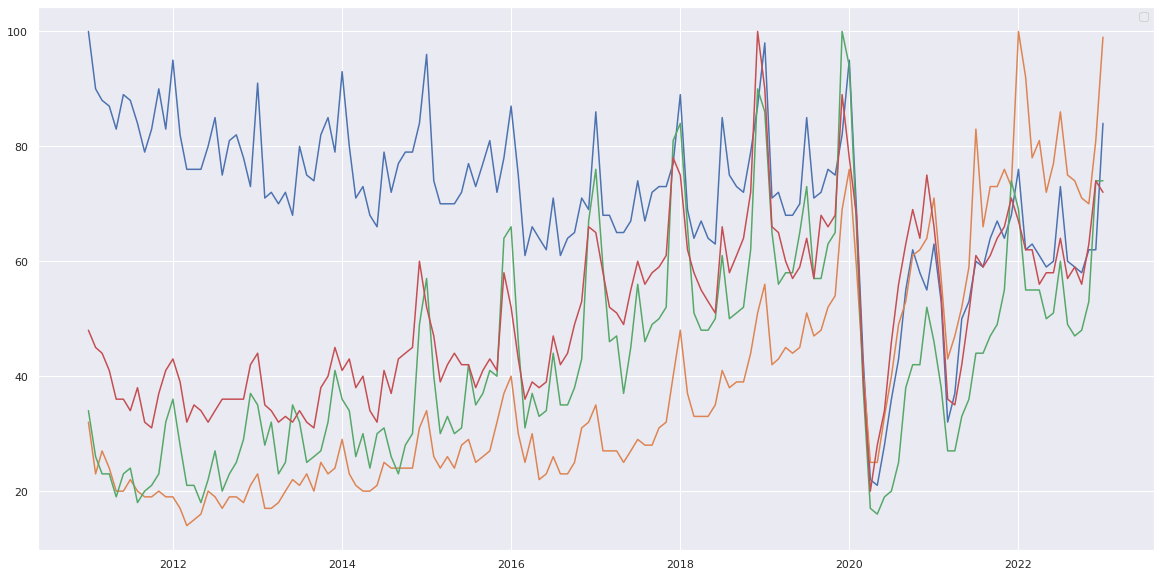

In [ ]:
plt.plot(viagem_dat)
plt.legend()

In [ ]:
def plotando_grafico(data_frame,colunas,cores):
  fig = go.Figure()
  for i,j in zip(colunas,cores):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data_frame.index, y=data_frame[i], name=i ,marker=dict(color=j)))  
    fig.update_layout(autosize=False, width=2000, height=1000)
    fig.show()


In [ ]:
colunas = viagem_dat.columns
cores = ['red','green','black','yellow']

In [ ]:
plotando_grafico(viagem_dat,colunas,cores)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=viagem_dat.index, y=viagem_dat['aluguel de carro'], name='aluguel de carro' ,marker=dict(color='red')))
fig.add_trace(go.Scatter(x=viagem_dat.index, y=viagem_dat['hotel'], name='hotel',marker=dict(color='green')))
fig.add_trace(go.Scatter(x=viagem_dat.index, y=viagem_dat['passagem de avião'], name='passagem de avião',marker=dict(color='black')))
fig.add_trace(go.Scatter(x=viagem_dat.index, y=viagem_dat['passagem de onibus'], name='passagem de onibus',marker=dict(color='yellow')))
fig.update_layout(autosize=False, width=2000, height=1000)
fig.show()


In [ ]:
viagem_dat

,hotel,passagem de avião,passagem de onibus,aluguel de carro
date,,,,
2011-01-01,100,32,34,48
2011-02-01,90,23,26,45
2011-03-01,88,27,23,44
2011-04-01,87,24,23,41
2011-05-01,83,20,19,36
...,...,...,...,...
2022-09-01,59,74,47,59
2022-10-01,58,71,48,56
2022-11-01,62,70,53,63


In [ ]:
transporte_dat

,onibus,logistica,frete,estrada
date,,,,
2011-01-01,52,72,30,62
2011-02-01,51,90,30,54
2011-03-01,46,100,29,60
2011-04-01,45,89,29,62
2011-05-01,43,88,29,55
...,...,...,...,...
2022-09-01,53,56,56,87
2022-10-01,53,54,56,81
2022-11-01,57,60,64,90


##Juntando os dados

In [ ]:
dados = pd.DataFrame()

In [ ]:
def criando_dados(dataframe):
  for j in dataframe.columns:
    dados[j] = dataframe[j]

In [ ]:
criando_dados(lazer_dat)

In [ ]:
criando_dados(viagem_dat)

In [ ]:
criando_dados(emprego_dat)

In [ ]:
criando_dados(transporte_dat)

In [ ]:
dados['tempo'] = tempo['tempo']

In [ ]:
dados

,restaurante,bar,cinema,show,parque,academia,hotel,passagem de avião,passagem de onibus,aluguel de carro,seguro desemprego,vaga,curriculo,emprestimo,onibus,logistica,frete,estrada,tempo
date,,,,,,,,,,,,,,,,,,,
2011-01-01,0,94,55,85,55,59,100,32,34,48,28,37,96,32,52,72,30,62,30
2011-02-01,0,93,45,71,44,58,90,23,26,45,29,37,100,34,51,90,30,54,24
2011-03-01,0,87,44,78,39,50,88,27,23,44,28,35,96,30,46,100,29,60,28
2011-04-01,0,89,46,100,40,49,87,24,23,41,26,33,90,31,45,89,29,62,25
2011-05-01,0,83,47,80,38,49,83,20,19,36,27,35,90,27,43,88,29,55,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-01,77,0,39,64,74,68,59,74,47,59,25,30,47,97,53,56,56,87,97
2022-10-01,74,0,33,46,70,68,58,71,48,56,23,29,44,100,53,54,56,81,90
2022-11-01,78,0,33,49,74,92,62,70,53,63,25,29,43,62,57,60,64,90,83


In [ ]:
dados.to_csv('trends.csv')

In [ ]:
try:
 dados = pd.read_csv('/content/trends.csv',index_col=['date'])
except:
  None

In [ ]:
dados 

,restaurante,bar,cinema,show,parque,academia,hotel,passagem de avião,passagem de onibus,aluguel de carro,seguro desemprego,vaga,curriculo,emprestimo,onibus,logistica,frete,estrada,tempo
date,,,,,,,,,,,,,,,,,,,
2011-01-01,0,94,55,85,55,59,100,32,34,48,28,37,96,32,52,72,30,62,30
2011-02-01,0,93,45,71,44,58,90,23,26,45,29,37,100,34,51,90,30,54,24
2011-03-01,0,87,44,78,39,50,88,27,23,44,28,35,96,30,46,100,29,60,28
2011-04-01,0,89,46,100,40,49,87,24,23,41,26,33,90,31,45,89,29,62,25
2011-05-01,0,83,47,80,38,49,83,20,19,36,27,35,90,27,43,88,29,55,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-01,77,0,39,64,74,68,59,74,47,59,25,30,47,97,53,56,56,87,97
2022-10-01,74,0,33,46,70,68,58,71,48,56,23,29,44,100,53,54,56,81,90
2022-11-01,78,0,33,49,74,92,62,70,53,63,25,29,43,62,57,60,64,90,83


#Dividindo os dados

In [ ]:
pms_final = pms.join(pms_raw['Valor'])

In [ ]:
pms_final.shape

(145, 6)

In [ ]:
pms_final.tail()

,0,1,2,3,4,Valor
date,,,,,,
2022-09-01,83.959658,9.232994,27.020495,-8.120644,5.304587,141.53394
2022-10-01,82.253299,19.955204,29.092987,-2.669314,0.840034,142.05129
2022-11-01,80.623043,8.231513,25.229726,-2.297222,0.128916,143.48816
2022-12-01,92.908820,-13.237977,26.657764,-11.939074,21.377640,NaN
2023-01-01,53.035846,-52.814079,85.064005,6.961750,-12.351393,NaN


In [ ]:
treino = pms_final.iloc[:-10]
treino.shape

(135, 6)

In [ ]:
print(treino.shape)
treino

(135, 6)


,0,1,2,3,4,Valor
date,,,,,,
2011-01-01,-83.026979,-23.453155,17.943912,-16.537447,-13.611508,71.28816
2011-02-01,-89.060894,-3.557080,11.247905,-18.876842,-28.355612,71.26033
2011-03-01,-87.238190,2.592417,8.465602,-26.250995,-23.285740,76.19429
2011-04-01,-92.147939,-0.358371,4.689475,-32.031494,-7.749889,75.49404
2011-05-01,-90.586271,10.612162,-0.132226,-26.521232,-16.038280,78.10675
...,...,...,...,...,...,...
2021-11-01,85.420193,-4.309770,34.812940,-8.289084,-1.625883,128.06385
2021-12-01,92.282288,-20.288443,13.095411,-13.325705,32.848708,141.29483
2022-01-01,95.002093,-16.158518,37.758294,-0.544405,-14.738162,121.08899


In [ ]:
teste = pms_final[-10:-3]
print(teste.shape)
teste

(7, 6)


,0,1,2,3,4,Valor
date,,,,,,
2022-04-01,72.778760,-0.424825,14.918708,-25.983760,11.476039,127.24787
2022-05-01,74.099016,7.006188,12.032848,-17.197088,2.541217,133.95219
2022-06-01,79.759918,5.421639,16.387385,-12.482750,9.495381,136.57999
2022-07-01,93.303578,-9.188505,31.055205,-8.808963,-2.771423,139.32229
2022-08-01,83.594528,14.215142,27.981777,-4.048616,-8.906861,142.80890
2022-09-01,83.959658,9.232994,27.020495,-8.120644,5.304587,141.53394
2022-10-01,82.253299,19.955204,29.092987,-2.669314,0.840034,142.05129


In [ ]:
validacao = pms_final[-3:]
print(validacao.shape)
validacao

(3, 6)


,0,1,2,3,4,Valor
date,,,,,,
2022-11-01,80.623043,8.231513,25.229726,-2.297222,0.128916,143.48816
2022-12-01,92.908820,-13.237977,26.657764,-11.939074,21.377640,NaN
2023-01-01,53.035846,-52.814079,85.064005,6.961750,-12.351393,NaN


#Componentes principais

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X_treino = treino.loc[:,treino.columns !='Valor']
y_treino = treino.loc[:,treino.columns =='Valor'].values.ravel()

In [ ]:
y_treino#

array([ 71.28816,  71.26033,  76.19429,  75.49404,  78.10675,  78.0198 ,
        79.85251,  81.73692,  81.16684,  81.51418,  83.51678,  90.414  ,
        80.33845,  78.98254,  85.8455 ,  82.37717,  86.33407,  85.17667,
        87.45287,  89.59727,  87.17604,  91.06747,  90.7868 ,  98.2613 ,
        88.16502,  84.59044,  91.10133,  91.96871,  92.86032,  92.63003,
        95.40427,  95.49182,  95.64669,  99.12276,  98.80582, 106.38097,
        96.3153 ,  93.12947,  97.27676,  97.65863,  99.02629,  97.96202,
        99.77023,  99.76429, 101.75202, 104.2877 , 102.43941, 110.61786,
        98.02601,  93.92167, 103.20941,  99.30222, 100.10821,  99.97258,
       101.85299, 100.83238, 101.74384, 103.82946, 101.5226 , 110.92681,
        97.93811,  95.78727, 102.78961,  99.47774,  99.3857 , 100.57346,
       102.13566, 103.02714, 101.49487, 100.59734, 101.58072, 109.31508,
        99.91524,  96.00351, 103.54774,  98.97776, 103.29154, 103.85361,
       104.06109, 104.88181, 103.89394, 105.60099, 

In [ ]:
X_teste = teste.loc[:,teste.columns !='Valor']
y_teste = teste.loc[:,teste.columns =='Valor'].values.ravel()

In [ ]:
X_validacao = validacao.loc[:,validacao.columns !='Valor']
y_validacao = validacao.loc[:,validacao.columns =='Valor'].values.ravel()

In [ ]:
pca = PCA(n_components=5)
pca_treino = pca.fit_transform(X_treino)

In [ ]:
pca_treino.shape

(135, 5)

In [ ]:
pca_teste = pca.transform(X_teste)

In [ ]:
pca_teste.shape

(7, 5)

In [ ]:
pca_validacao = pca.transform(X_validacao)

In [ ]:
pca_validacao.shape

(3, 5)

#Treinando os modelos
https://goldinlocks.github.io/Time-Series-Cross-Validation/

In [ ]:
from pmdarima.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, TimeSeriesSplit

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
rng = np.random.RandomState(0)

In [ ]:
n_splits = 10
test_size = 7
tscv= TimeSeriesSplit(max_train_size=223,n_splits= 10,test_size=12)
for fold, (train_index, test_index) in enumerate(tscv.split(pca_treino)):
    print("Fold: {}".format(fold))
    print("TRAIN indices:", train_index, "\n", "TEST indices:", test_index)
    print("\n")
    X_train, X_test = pca_treino[train_index], pca_treino[test_index]
    y_train, y_test = y_treino[train_index], y_treino[test_index]


ng = np.random.RandomState(1338)
#cv, X, y, groups, ax, n_splits
#fig, ax = plt.subplots()
#plot_cv_indices(tscv, X,  y, groups,ax, n_splits,lw=10,lim=len(X))


Fold: 0
TRAIN indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] 
 TEST indices: [15 16 17 18 19 20 21 22 23 24 25 26]


Fold: 1
TRAIN indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26] 
 TEST indices: [27 28 29 30 31 32 33 34 35 36 37 38]


Fold: 2
TRAIN indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38] 
 TEST indices: [39 40 41 42 43 44 45 46 47 48 49 50]


Fold: 3
TRAIN indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50] 
 TEST indices: [51 52 53 54 55 56 57 58 59 60 61 62]


Fold: 4
TRAIN indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62] 
 TEST indices: [63 64 65 66 67 68 69 70 71 72 73 74]


Fold

##Treinando o RandomForestRegressor

In [ ]:
def frame(consjunto_de_dados,nome):
  a = pd.DataFrame(consjunto_de_dados).mean()
  b = pd.DataFrame(a)
  b.columns = [nome]
  return b 

In [ ]:
#https://medium.com/keita-starts-data-science/time-series-split-with-scikit-learn-74f5be38489e
"""Este código executa uma divisão de série temporal usando a função TimeSeriesSplit do módulo model_selection do scikit-learn e aplica um Random Forest Regressor do módulo ensemble do scikit-learn a um conjunto de dados. 
O código também usa a função mean_squared_error do módulo de métricas do scikit-learn para avaliar o desempenho do modelo e os módulos matemático e aleatório.
O código começa inicializando listas vazias para armazenar resultados e criando uma instância da classe TimeSeriesSplit, com max_train_size = 213, n_splits = 10 e test_size = 12.
O código então entra em um loop while, que será executado até 1000 vezes, tentando diferentes combinações de parâmetros para o Random Forest Regressor. Dentro do loop while, o código usa random.choices para selecionar aleatoriamente uma das 
três funções de critério ('squared_error', 'absolute_error', 'friedman_mse') e random.sample para selecionar aleatoriamente um valor max_features, n_estimators, max_depth e min_samples_leaf a partir de uma gama de valores possíveis.
Para cada combinação dos parâmetros, o código executa uma divisão de série temporal usando o objeto TimeSeriesSplit e ajusta o Random Forest Regressor aos dados de treinamento. O código então usa o regressor para prever os dados de validação e 
calcula a raiz do erro quadrático médio (RMSE) entre os dados de validação previstos e reais. O RMSE é anexado a uma lista mean_erro.
Após a divisão da série temporal, o código anexa a combinação de parâmetros usados ​​e a média da lista mean_erro à lista de pontuação.
Por fim, o código cria um dataframe a partir da lista de pontuação, nomeia as colunas do dataframe e classifica o dataframe por mean_square_error em ordem crescente.
"""
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import math
import random
tscv = TimeSeriesSplit(max_train_size=223,n_splits= 10,test_size=12)
i = 1
score = []
residuo_ran = []
maxima_cara = pca_treino.shape[1]
##X_tr, X_val = X_train[tr_index], X_train[val_index]
#y_tr, y_val = y_train[tr_index], y_train[val_index]
parada = 0
while parada < 1000:
  for cr in random.choices(['squared_error','absolute_error','friedman_mse']):
    for mf in random.sample(list(range(1, maxima_cara)),1):
      for ne in random.sample(list(range(5, 100)),1):
        for md in random.sample(list(range(1, 40)),1):
          for msl in random.sample(list(range(1, 100)),1):
            mean_erro = []
            valores_reais = []
            residuos = []
            for train_index, test_index in tscv.split(pca_treino):
              X_tr, X_val = pca_treino[train_index], pca_treino[test_index]
              y_tr, y_val = y_treino[train_index], y_treino[test_index]
              rfr = RandomForestRegressor(random_state=0,
              criterion = cr,
              max_features=int(mf),
              n_estimators=int(ne),
              max_depth=int(md),
              min_samples_leaf=int(msl))
              rfr.fit(X_tr, y_tr)
              mean_erro.append(np.sqrt(mean_squared_error(y_val, rfr.predict(X_val))))
              valores_reais.append(y_val)
              residuos.append(np.mean(y_val - rfr.predict(X_val)))
            residuo_ran.append(residuos)
            score.append([cr,mf, ne, md, msl,np.mean(mean_erro)])
            residuo_ran.append(residuos)
            print(score[-1])
            print(parada)
            parada = parada + 1
result_random = pd.DataFrame.from_dict(score)
result_random.columns = ['criterion','max_features', 'n_estimators','max_depth','min_samples_leaf','mean_square_error']
result_random.sort_values(by='mean_square_error',inplace=True)

['squared_error', 2, 40, 11, 20, 12.16765899303446]
0
['friedman_mse', 3, 85, 35, 14, 10.295774398095483]
1
['friedman_mse', 2, 92, 4, 33, 13.070341830901063]
2
['absolute_error', 4, 93, 19, 86, 11.916345543848294]
3
['squared_error', 3, 89, 2, 75, 13.239335878005416]
4
['friedman_mse', 3, 62, 11, 26, 12.37824782338985]
5
['squared_error', 1, 78, 23, 89, 13.218725722253737]
6
['friedman_mse', 2, 75, 6, 29, 12.835374962046208]
7
['squared_error', 2, 89, 29, 34, 13.094467349973655]
8
['squared_error', 4, 69, 24, 18, 10.719479861276083]
9
['absolute_error', 1, 30, 13, 40, 11.912349651879115]
10
['friedman_mse', 2, 17, 36, 15, 11.244364681529923]
11
['absolute_error', 3, 21, 33, 62, 11.944283350167314]
12
['absolute_error', 2, 99, 2, 95, 11.898944114972432]
13
['squared_error', 1, 70, 11, 3, 9.793692498263871]
14
['absolute_error', 3, 20, 36, 63, 11.972290473655628]
15
['absolute_error', 2, 83, 2, 79, 11.871642665705425]
16
['absolute_error', 2, 50, 2, 48, 11.916272718197423]
17
['friedman

In [ ]:
result_random

,criterion,max_features,n_estimators,max_depth,min_samples_leaf,mean_square_error
806,squared_error,4,14,22,2,6.704700
857,squared_error,4,58,31,1,6.833851
516,absolute_error,3,90,30,1,6.844087
742,friedman_mse,4,95,6,2,7.064495
148,friedman_mse,4,51,21,2,7.096684
...,...,...,...,...,...,...
849,squared_error,3,8,10,28,13.408977
214,squared_error,1,13,32,54,13.425747
316,friedman_mse,4,13,36,53,13.425747
87,friedman_mse,3,13,35,69,13.425747


In [ ]:
result_random.to_csv('result_random.csv')

##Treinando o Reggressao lasso

In [ ]:
#https://medium.com/keita-starts-data-science/time-series-split-with-scikit-learn-74f5be38489e
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import math
from sklearn import linear_model
tscv = TimeSeriesSplit(max_train_size=213,n_splits= 10,test_size=12)
i = 1
score = []
pred_peri_lasso = []
valores_re = []
residuo_las= []
for alpha in np.linspace(0.01, 2, 1000):
  for fit_inter in random.choices(['False', 'True']):
    mean_erro = []
    residuos = []
    for train_index, test_index in tscv.split(pca_treino):
      X_tr, X_val = pca_treino[train_index], pca_treino[test_index]
      y_tr, y_val = y_treino[train_index], y_treino[test_index]
      lasso = linear_model.Lasso(random_state=0,alpha=alpha,fit_intercept=fit_inter)
      lasso.fit(X_tr, y_tr)
      mean_erro.append(np.sqrt(mean_squared_error(y_val, lasso.predict(X_val))))
      pred_peri_lasso.append(lasso.predict(X_val)) 
      residuos.append(np.mean(y_val - lasso.predict(X_val)))  
    residuo_las.append(residuos)
    score.append([alpha, 
                  fit_inter,
                  np.mean(mean_erro)])
    print(score[-1])
result_lasso = pd.DataFrame.from_dict(score)
result_lasso.columns = ['alpha', 'fit_inter','mean_square_error']
result_lasso.sort_values(by='mean_square_error',inplace=True)

[0.01, 'False', 9.56508913335964]
[0.011991991991991992, 'True', 9.565040158119045]
[0.013983983983983983, 'True', 9.565082414901655]
[0.015975975975975977, 'True', 9.565046435769242]
[0.017967967967967968, 'True', 9.565002466612919]
[0.019959959959959958, 'False', 9.564982213186278]
[0.021951951951951952, 'True', 9.564933101163891]
[0.023943943943943943, 'True', 9.564877930216213]
[0.025935935935935933, 'True', 9.564865429694349]
[0.027927927927927927, 'True', 9.564818588542396]
[0.02991991991991992, 'False', 9.564798305175994]
[0.03191191191191191, 'True', 9.564766430855588]
[0.0339039039039039, 'True', 9.564716974995338]
[0.035895895895895896, 'True', 9.56468370968169]
[0.03788788788788788, 'False', 9.564648515503773]
[0.03987987987987988, 'False', 9.564616117180027]
[0.04187187187187187, 'False', 9.564574173609667]
[0.043863863863863865, 'False', 9.564522014399579]
[0.04585585585585585, 'False', 9.56448714529191]
[0.047847847847847846, 'False', 9.564494940850787]
[0.049839839839839

In [ ]:
y_val-lasso.predict(X_val)

array([ 8.92093681, 10.88266908, 11.77243223, 12.37039885, 15.65438787,
       14.09070487, 12.63203115, 17.98677694, 22.88381078, 10.87364425,
       12.7542218 , 25.96889078])

In [ ]:
result_lasso

,alpha,fit_inter,mean_square_error
999,2.000000,False,9.506628
998,1.998008,True,9.506765
997,1.996016,True,9.506902
996,1.994024,False,9.507040
995,1.992032,True,9.507177
...,...,...,...
536,1.077708,True,9.570178
532,1.069740,False,9.570191
533,1.071732,False,9.570247
535,1.075716,True,9.570307


In [ ]:
result_lasso.to_csv('result_lasso.csv')

## Treinando gradiente Bosting 

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import math
import random
tscv = TimeSeriesSplit(max_train_size=213,n_splits= 10,test_size=12)
i = 1
score = []
pred_peri_gd = []
maxima_cara = X.shape[1]
parada = 0
residuo_gradiente = []
while parada < 1000:
  for los in random.choices(['squared_error', 'absolute_error', 'huber', 'quantile']):
    for rate in np.random.uniform(0.01,2,1):
      for ne in random.sample(list(range(10, 500)),1):
        for md in random.sample(list(range(1, 40)),1):
          for msl in random.sample(list(range(1, 100)),1):
            for crit in random.choices(['friedman_mse', 'squared_error']):
              mean_erro = []
              residuos=[]
              for train_index, test_index in tscv.split(pca_treino):
                X_tr, X_val = pca_treino[train_index], pca_treino[test_index]
                y_tr, y_val = y_treino[train_index], y_treino[test_index]
                grad_bost = GradientBoostingRegressor(random_state=0,
                loss = los,
                learning_rate = rate,
                criterion=crit,
                max_features=int(mf),
                n_estimators=int(ne),
                max_depth=int(md),
                min_samples_leaf=int(msl))
                grad_bost.fit(X_tr, y_tr)
                mean_erro.append(np.sqrt(mean_squared_error(y_val, grad_bost.predict(X_val))))
                pred_peri_gd.append(grad_bost.predict(X_val))
                residuos.append(np.mean(y_val - grad_bost.predict(X_val)))  
              residuo_gradiente.append(np.mean(residuos))
              score.append([los,rate,mf, ne, md, msl,crit,np.mean(mean_erro)])
              print(score[-1])
              print(parada)
              parada = parada + 1
result_gradi_bostin = pd.DataFrame.from_dict(score)
result_gradi_bostin.columns = ['loss','learning_rate','max_features', 'n_estimators','max_depth','min_samples_leaf','criterio','mean_square_error']
result_gradi_bostin.sort_values(by='mean_square_error',inplace=True)

['absolute_error', 0.062217942304354824, 4, 383, 18, 14, 'squared_error', 7.7599627973660406]
0
['huber', 1.5058639246276446, 4, 454, 33, 72, 'squared_error', 12.945635147978313]
1
['quantile', 1.3654176863618463, 4, 365, 25, 87, 'friedman_mse', 6.496135794116869]
2
['squared_error', 0.30812800764642123, 4, 439, 22, 34, 'squared_error', 10.008434102750076]
3
['absolute_error', 0.25434289422567274, 4, 132, 14, 84, 'squared_error', 11.868588959210616]
4
['absolute_error', 1.9452531764638696, 4, 234, 22, 64, 'squared_error', 11.868588959210616]
5
['absolute_error', 0.03796695382547563, 4, 79, 32, 31, 'squared_error', 10.140984081683474]
6
['absolute_error', 1.082570859653156, 4, 246, 32, 19, 'squared_error', 7.693895940540133]
7
['absolute_error', 0.5525871071959307, 4, 151, 11, 11, 'squared_error', 7.281663649750016]
8
['huber', 1.3364742013055453, 4, 120, 21, 38, 'squared_error', 10.854253037936187]
9
['huber', 1.2460955912089475, 4, 149, 16, 24, 'squared_error', 8.77665382737278]
10
['

In [ ]:
result_gradi_bostin

,loss,learning_rate,max_features,n_estimators,max_depth,min_samples_leaf,criterio,mean_square_error
353,quantile,0.220842,4,381,28,5,squared_error,5.079911
288,quantile,0.357946,4,415,19,3,friedman_mse,5.263025
902,quantile,0.111650,4,68,21,7,squared_error,5.348310
748,quantile,0.078894,4,265,33,6,friedman_mse,5.362773
729,quantile,0.671458,4,98,35,32,friedman_mse,5.457700
...,...,...,...,...,...,...,...,...
402,huber,1.913277,4,387,9,62,squared_error,14.721332
289,huber,1.939711,4,213,9,95,friedman_mse,15.582672
754,huber,1.943792,4,311,4,76,squared_error,15.962094
114,huber,1.999936,4,201,37,26,squared_error,18.322320


In [ ]:
result_gradi_bostin.to_csv('result_gradi_bostin.csv')

#Comparando os modelos

In [ ]:
y_val= teste['Valor'].values
X_val=teste.loc[:,teste.columns != 'Valor'].values
teste.index

DatetimeIndex(['2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01',
               '2022-08-01', '2022-09-01', '2022-10-01'],
              dtype='datetime64[ns]', name='date', freq=None)

##Avaliando os residuos dos medelos

https://medium.com/@krzysztofdrelczuk/acf-autocorrelation-function-simple-explanation-with-python-example-492484c32711

###Regressao lasso

In [ ]:
##Pegando os melhores paramentros
for j in result_lasso.columns:
  if j == 'alpha':
    alpha = result_lasso.loc[result_lasso.index[0],j]
  if j == 'fit_inter':
    fit_inter = result_lasso.loc[result_lasso.index[0],j]
  else:
    None
print(f'Alpha:{alpha}')
print(f'fit_inter:{fit_inter}')

Alpha:2.0
fit_inter:False


In [ ]:
lasso = linear_model.Lasso(random_state=0,alpha=alpha,fit_intercept=fit_inter)

In [ ]:
lasso = lasso.fit(pca_treino, y_treino)

In [ ]:
predic_treino = lasso.predict(pca_treino)

In [ ]:
residuo_lasso = y_treino - predic_treino

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=residuo_lasso,name='Residuos Lasso', texttemplate = "%{y}",textfont_size=20))
fig.update_traces(opacity=0.55)
fig.update_layout(autosize=False, width=2000, height=1000,title_text=i)
fig.show()

Gráfico ACF de resíduos
Com dados de séries temporais, é altamente provável que o valor de uma variável observada no período de tempo atual seja semelhante ao seu valor no período anterior, ou mesmo no período anterior a esse, e assim por diante. Portanto, ao ajustar um modelo de regressão a dados de séries temporais, é comum encontrar autocorrelação nos resíduos. Nesse caso, o modelo estimado viola a suposição de não haver autocorrelação nos erros, e nossas previsões podem ser ineficientes — sobra alguma informação que deve ser contabilizada no modelo para obter melhores previsões. As previsões de um modelo com erros autocorrelacionados ainda não são viesadas e, portanto, não estão “erradas”, mas geralmente terão intervalos de previsão maiores do que o necessário. Portanto, devemos sempre olhar para um gráfico ACF dos resíduos.

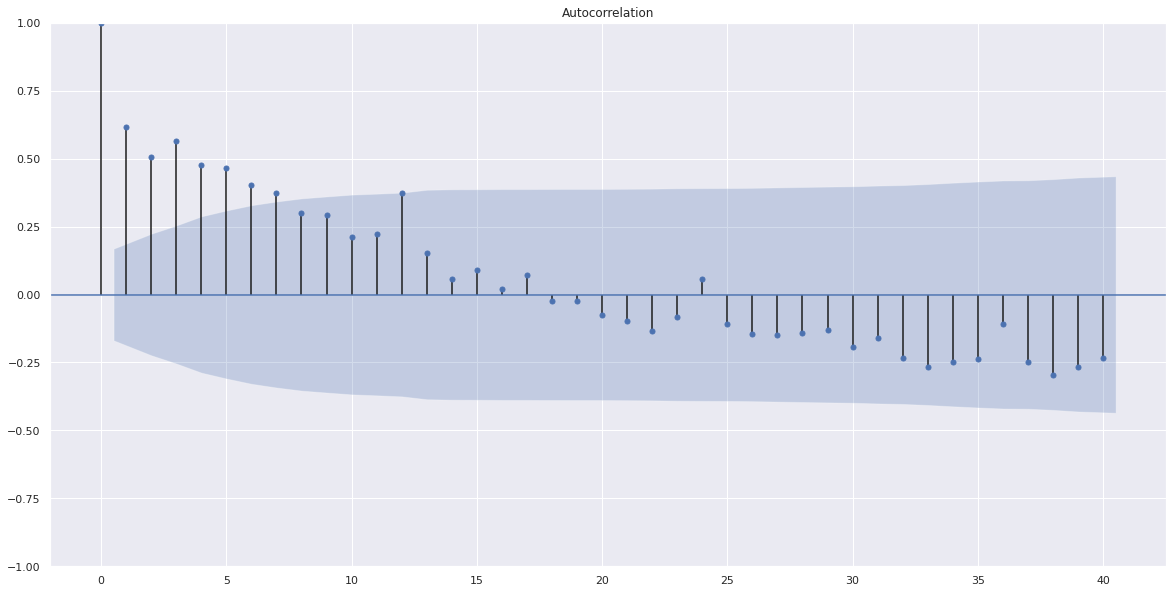

In [ ]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(residuo_lasso,lags=40)
plt.show()

###Random forest

In [ ]:
##Pegando os melhores paramentros
for j in result_random.columns:
  if j == 'criterion':
    criterion = result_random.loc[result_random.index[0],j]
  if j == 'max_features':
    max_features = result_random.loc[result_random.index[0],j]
  if j == 'n_estimators':
    n_estimators	 = result_random.loc[result_random.index[0],j]
  if j == 'max_depth':
    max_depth = result_random.loc[result_random.index[0],j]
  if j == 'min_samples_leaf':
    min_samples_leaf = result_random.loc[result_random.index[0],j]
  else:
    None
print(f'criterion:{criterion}')
print(f'max_features:{max_features}')
print(f'n_estimators:{n_estimators}')
print(f'max_depth:{max_depth}')
print(f'min_samples_leaf:{min_samples_leaf}')

criterion:squared_error
max_features:4
n_estimators:14
max_depth:22
min_samples_leaf:2


In [ ]:
rfr = RandomForestRegressor(random_state=0,
              criterion = criterion,
              max_features=max_features,
              n_estimators=n_estimators,
              max_depth=max_depth,
              min_samples_leaf=min_samples_leaf)

In [ ]:
rfr.fit(pca_treino, y_treino)

RandomForestRegressor(max_depth=22, max_features=4, min_samples_leaf=2,
                      n_estimators=14, random_state=0)

In [ ]:
predic_rando_treino = rfr.predict(pca_treino)

In [ ]:
predic_rando_treino.shape

(135,)

In [ ]:
residuo_random = y_treino-predic_rando_treino

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=residuo_random,name='Residuos Random', texttemplate = "%{y}",textfont_size=20))
fig.update_traces(opacity=0.55)
fig.update_layout(autosize=False, width=2000, height=1000,title_text=i)
fig.show()

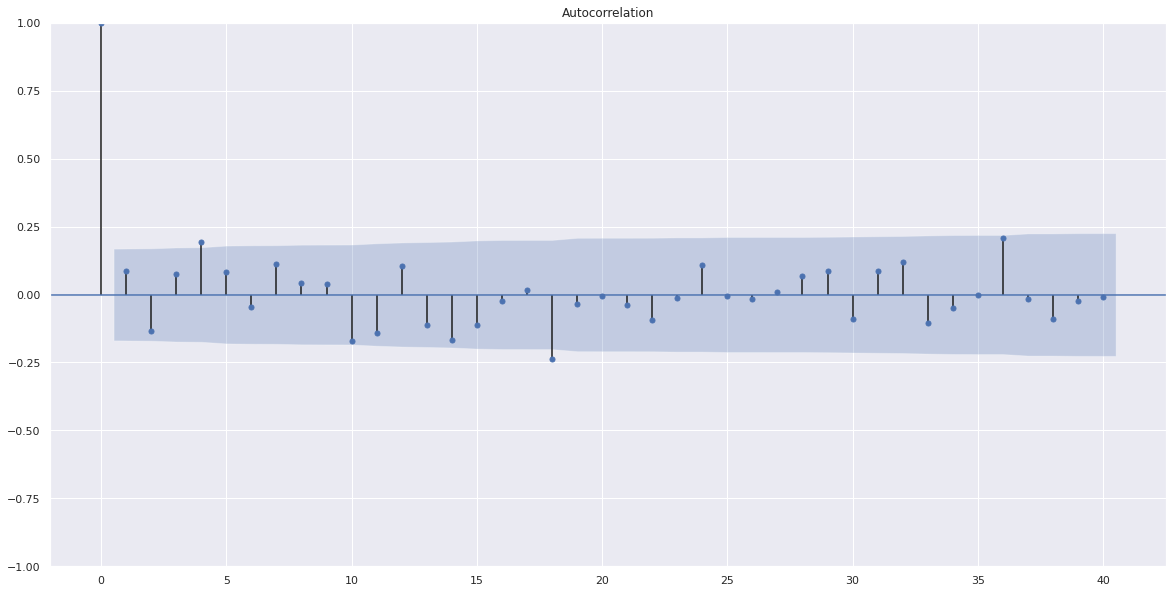

In [ ]:
sm.graphics.tsa.plot_acf(residuo_random,lags=40)
plt.show()

###Gradiente Boosting

In [ ]:
result_gradi_bostin.head()

,loss,learning_rate,max_features,n_estimators,max_depth,min_samples_leaf,criterio,mean_square_error
353,quantile,0.220842,4,381,28,5,squared_error,5.079911
288,quantile,0.357946,4,415,19,3,friedman_mse,5.263025
902,quantile,0.111650,4,68,21,7,squared_error,5.348310
748,quantile,0.078894,4,265,33,6,friedman_mse,5.362773
729,quantile,0.671458,4,98,35,32,friedman_mse,5.457700


In [ ]:
##Pegando os melhores paramentros
for j in result_gradi_bostin.columns:
  if j == 'loss':
    loss = result_gradi_bostin.loc[result_gradi_bostin.index[0],j]
  if j == 'max_features':
    max_features = result_gradi_bostin.loc[result_gradi_bostin.index[0],j]
  if j == 'n_estimators':
    n_estimators	 = result_gradi_bostin.loc[result_gradi_bostin.index[0],j]
  if j == 'max_depth':
    max_depth = result_gradi_bostin.loc[result_gradi_bostin.index[0],j]
  if j == 'min_samples_leaf':
    min_samples_leaf = result_gradi_bostin.loc[result_gradi_bostin.index[0],j]
  if j == 'learning_rate':
    learning_rate = result_gradi_bostin.loc[result_gradi_bostin.index[0],j]
  if j == 'criterio':
    criterio = result_gradi_bostin.loc[result_gradi_bostin.index[0],j]
  else:
    None
print(f'criterion:{criterion}')
print(f'max_features:{max_features}')
print(f'n_estimators:{n_estimators}')
print(f'max_depth:{max_depth}')
print(f'min_samples_leaf:{min_samples_leaf}')
print(f'learning_rate:{learning_rate}')
print(f'loss:{loss}')

criterion:squared_error
max_features:4
n_estimators:381
max_depth:28
min_samples_leaf:5
learning_rate:0.22084198408740596
loss:quantile


In [ ]:
grad_bost = GradientBoostingRegressor(random_state=0,
                loss = loss,
                learning_rate = learning_rate,
                criterion=criterion,
                max_features=max_features,
                n_estimators=n_estimators,
                max_depth=max_depth,
                min_samples_leaf=min_samples_leaf)
grad_bost.fit(pca_treino, y_treino)

GradientBoostingRegressor(criterion='squared_error',
                          learning_rate=0.22084198408740596, loss='quantile',
                          max_depth=28, max_features=4, min_samples_leaf=5,
                          n_estimators=381, random_state=0)

In [ ]:
predict_grad_treino = grad_bost.predict(pca_treino)

In [ ]:
residuo_grad = y_treino - predict_grad_treino

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=residuo_grad,name='Residuos Gradiente', texttemplate = "%{y}",textfont_size=20))
fig.update_traces(opacity=0.55)
fig.update_layout(autosize=False, width=2000, height=1000,title_text=i)
fig.show()

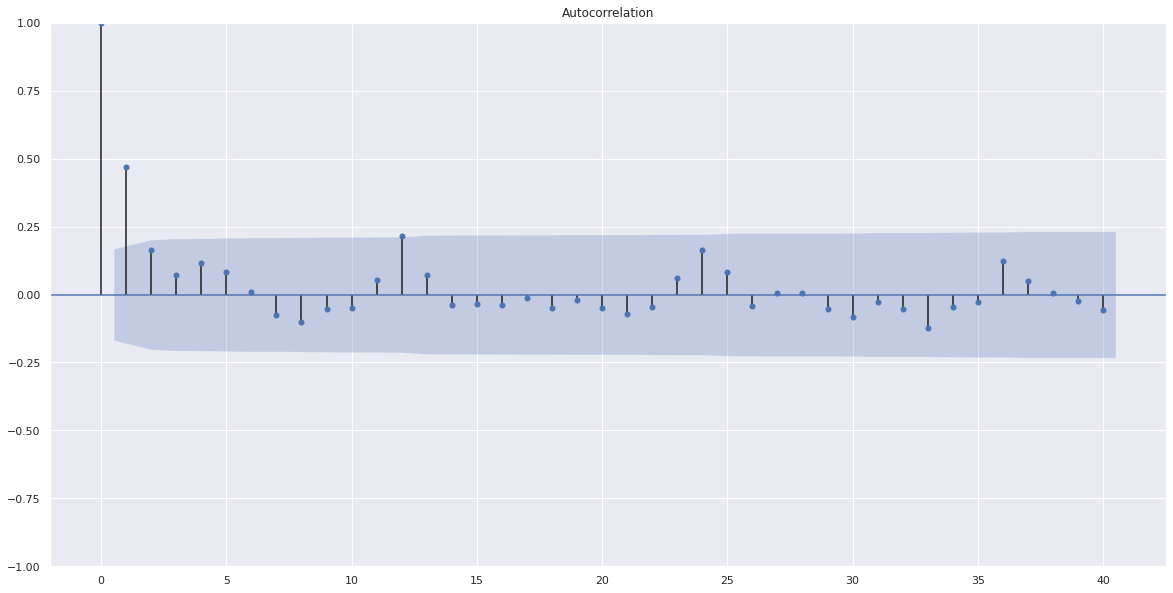

In [ ]:
sm.graphics.tsa.plot_acf(residuo_grad,lags=40)
plt.show()

##Previsao com dados de teste

In [ ]:
predict_lasso_vali = lasso.predict(pca_teste)
predict_random_vali = rfr.predict(pca_teste)
predict_gradiente_vali = grad_bost.predict(pca_teste)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=teste.index, y=y_teste, name='PMS',marker=dict(color='red')))
fig.add_trace(go.Scatter(x=teste.index, y=predict_lasso_vali, name='LASSO',marker=dict(color='green')))
fig.add_trace(go.Scatter(x=teste.index, y=predict_random_vali, name='RANDOM FOREST',marker=dict(color='black')))
fig.add_trace(go.Scatter(x=teste.index, y=predict_gradiente_vali, name='LASSO',marker=dict(color='yellow')))
fig.update_layout(autosize=False, width=2000, height=1000)
fig.show()

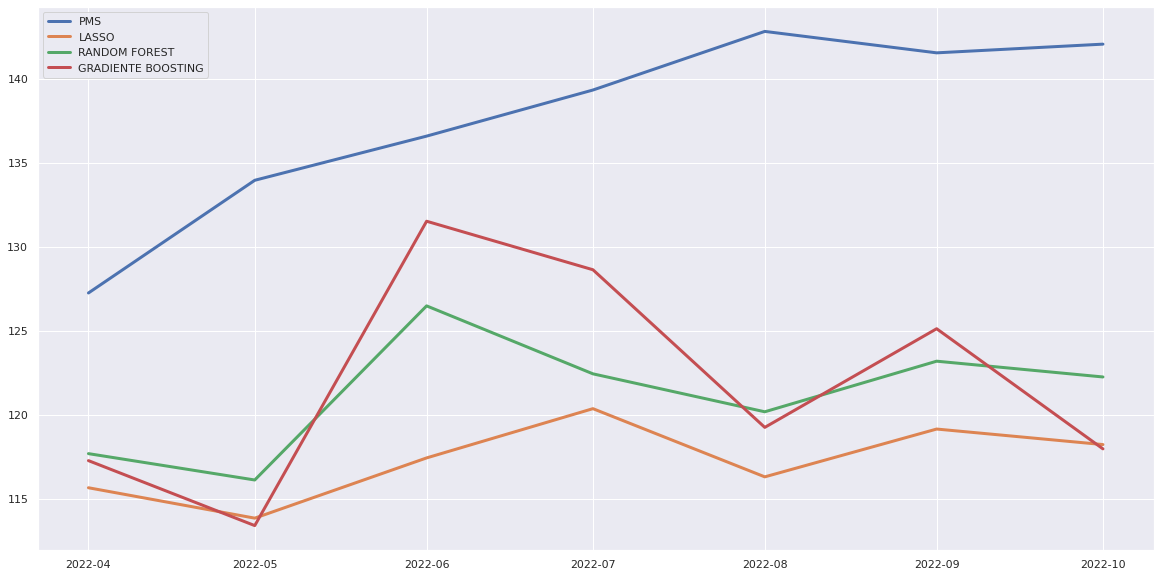

In [ ]:
plt.plot(teste.index,y_teste, label='PMS',linewidth=3)
plt.plot(teste.index,predict_lasso_vali, label='LASSO',linewidth=3)
plt.plot(teste.index,predict_random_vali, label='RANDOM FOREST',linewidth=3)
plt.plot(teste.index,predict_gradiente_vali, label='GRADIENTE BOOSTING',linewidth=3)
plt.legend();

###Intervalos de previsao

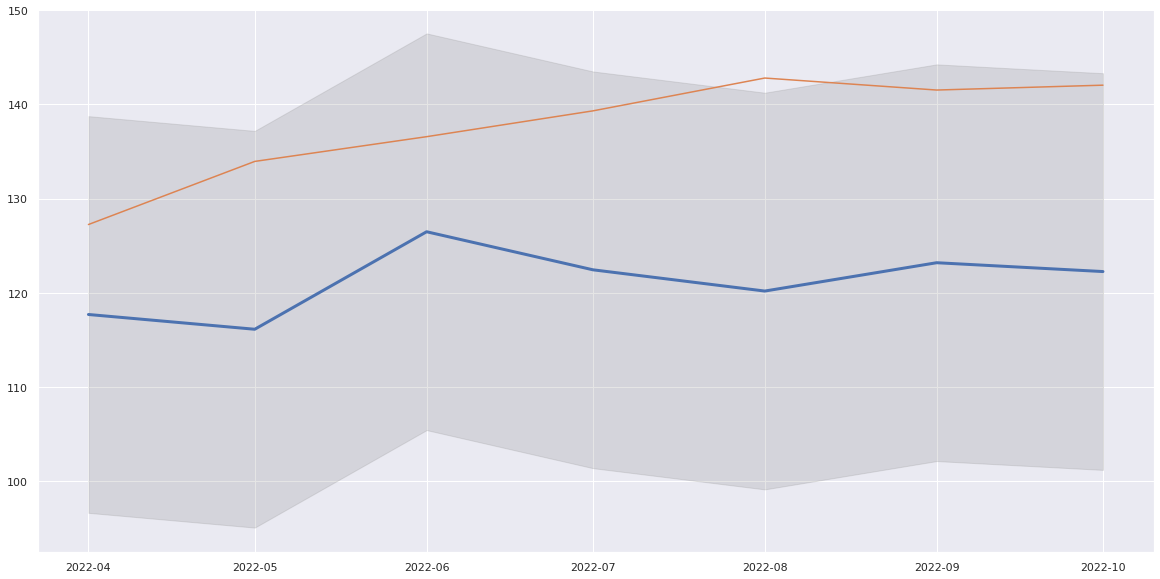

In [ ]:
pre_int = pd.DataFrame(predict_random_vali,index=teste.index,columns=['Random'])
pre_int['Random_0,95_cima'] = pre_int['Random'].apply(lambda x : x + (1.96*(abs(np.mean(residuo_ran)))))
pre_int['Random_0,95_abaixo'] = pre_int['Random'].apply(lambda x : x - (1.96*(abs(np.mean(residuo_ran)))))
plt.plot(pre_int.index,pre_int['Random'], label='Predição Random',linewidth=3)
plt.fill_between(pre_int.index, pre_int['Random_0,95_abaixo'], pre_int['Random_0,95_cima'], color='gray', alpha=0.2)
plt.plot(pre_int.index,y_teste)

In [ ]:
def plotando_intervalo(predict_val,index,dados_validacao,residuos,nomes):
  pre_int = pd.DataFrame(predict_val,index=index,columns=[str(nomes)])
  residuos= abs(np.mean(residuos))
  pre_int[str(nomes) +'_0,95_cima'] = pre_int[str(nomes)].apply(lambda x : x + (1.96*(abs(np.mean(residuos)))))
  pre_int[str(nomes) +'_0,95_baixo'] = pre_int[str(nomes)].apply(lambda x : x - (1.96*(abs(np.mean(residuos)))))
  plt.plot(pre_int.index,pre_int[str(nomes)], label='Predição_'+str(nomes),linewidth=3)
  plt.fill_between(pre_int.index, pre_int[str(nomes)+'_0,95_cima'], pre_int[str(nomes) +'_0,95_baixo'], color='gray', alpha=0.2)
  plt.plot(teste.index,y_teste,label='Validação')
  plt.legend()
  return pre_int

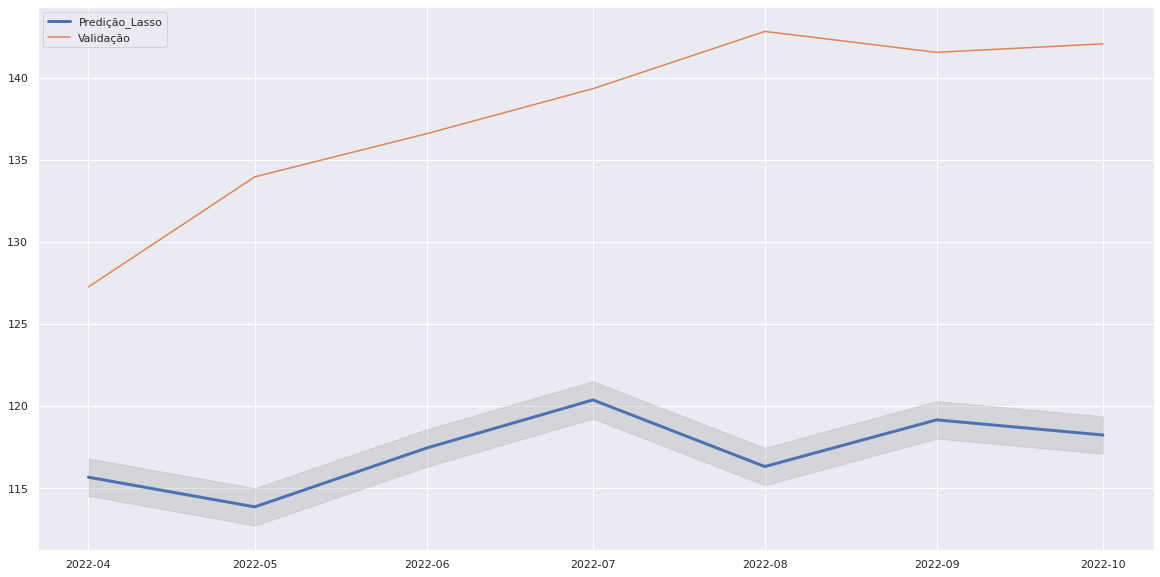

In [ ]:
intervalo_lasso = plotando_intervalo(predict_lasso_vali,teste.index,y_teste,residuo_las,'Lasso')

In [ ]:
intervalo_lasso

,Lasso,"Lasso_0,95_cima","Lasso_0,95_baixo"
date,,,
2022-04-01,115.662267,116.801449,114.523085
2022-05-01,113.853448,114.992630,112.714266
2022-06-01,117.436696,118.575879,116.297514
2022-07-01,120.366886,121.506069,119.227704
2022-08-01,116.309904,117.449086,115.170722
2022-09-01,119.154012,120.293195,118.014830
2022-10-01,118.230282,119.369464,117.091100


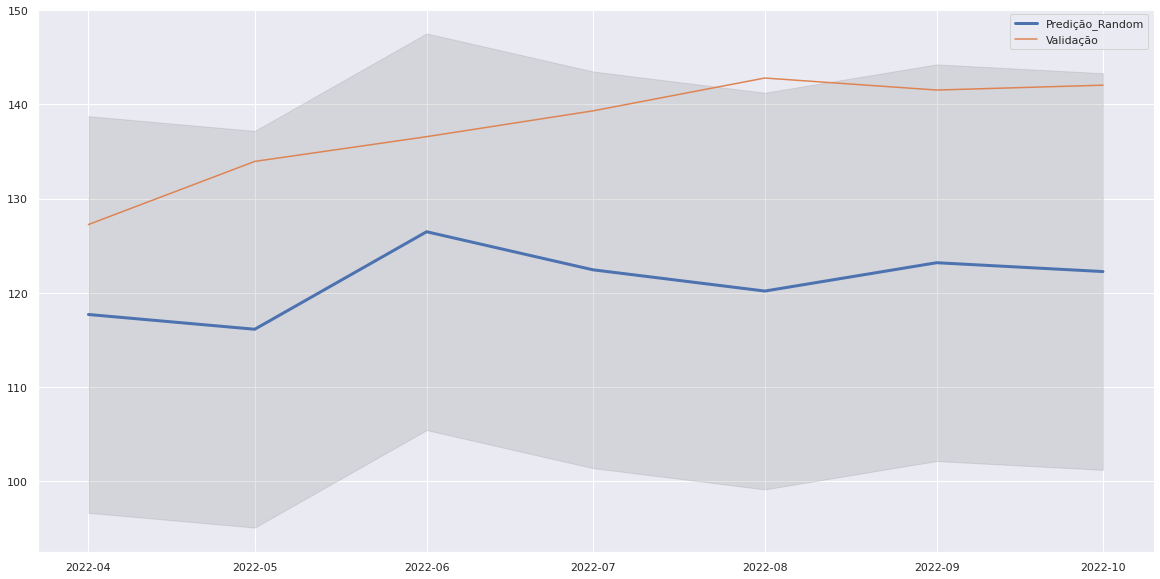

In [ ]:
intervalo_random = plotando_intervalo(predict_random_vali,teste.index,y_teste,residuo_ran,'Random')

In [ ]:
intervalo_random

,Random,"Random_0,95_cima","Random_0,95_baixo"
date,,,
2022-04-01,117.691870,138.760581,96.623160
2022-05-01,116.123635,137.192345,95.054925
2022-06-01,126.481066,147.549776,105.412355
2022-07-01,122.438820,143.507530,101.370109
2022-08-01,120.181096,141.249806,99.112386
2022-09-01,123.191074,144.259784,102.122364
2022-10-01,122.252377,143.321087,101.183666


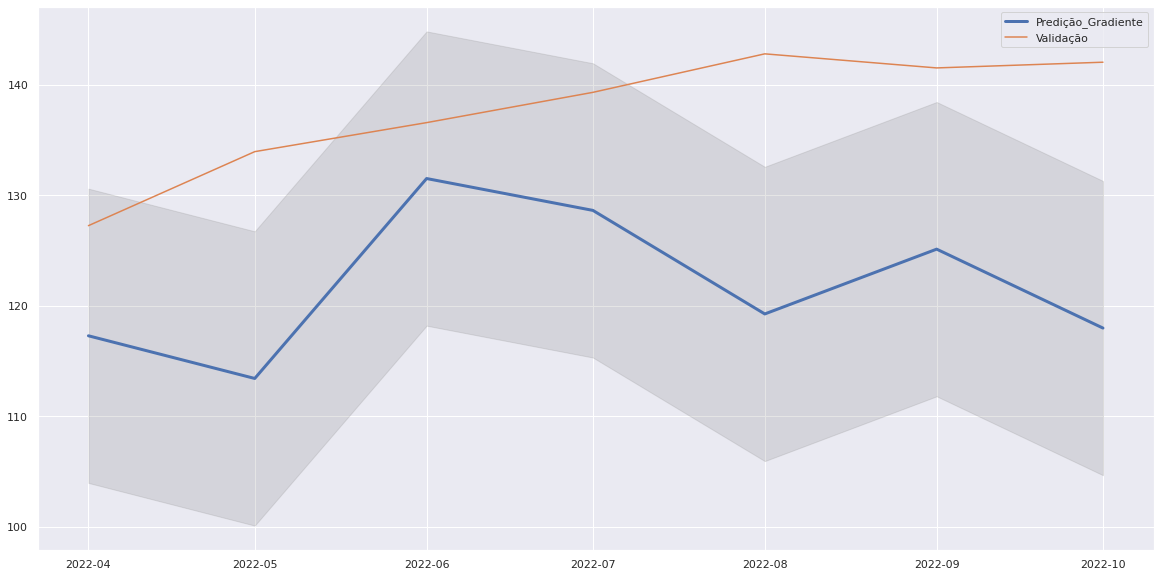

In [ ]:
intervalo_gradiente = plotando_intervalo(predict_gradiente_vali,teste.index,y_val,residuo_gradiente,'Gradiente')

In [ ]:
intervalo_gradiente

,Gradiente,"Gradiente_0,95_cima","Gradiente_0,95_baixo"
date,,,
2022-04-01,117.276026,130.600138,103.951914
2022-05-01,113.410804,126.734916,100.086692
2022-06-01,131.516462,144.840574,118.192350
2022-07-01,128.630609,141.954721,115.306497
2022-08-01,119.252849,132.576961,105.928737
2022-09-01,125.121726,138.445838,111.797614
2022-10-01,117.973993,131.298105,104.649881



##Cenarios com dados fora da amostra

In [ ]:
arima_lasso = lasso.predict(pca_validacao)
arima_random = rfr.predict(pca_validacao)
arima_gradien = grad_bost.predict(pca_validacao)

In [ ]:
predicao = pd.DataFrame({'lassso':arima_lasso,
                         'Random Forest':arima_random,
                         'Gradiente Bosting':arima_gradien},
                        index=pd.to_datetime(validacao.index).strftime("%Y-%m"))

In [ ]:
predicao

,lassso,Random Forest,Gradiente Bosting
date,,,
2022-11,117.822922,123.573710,121.476746
2022-12,124.696551,123.466510,134.227245
2023-01,125.215982,106.756993,106.889303


In [ ]:
y_validacao

array([143.48816,       nan,       nan])

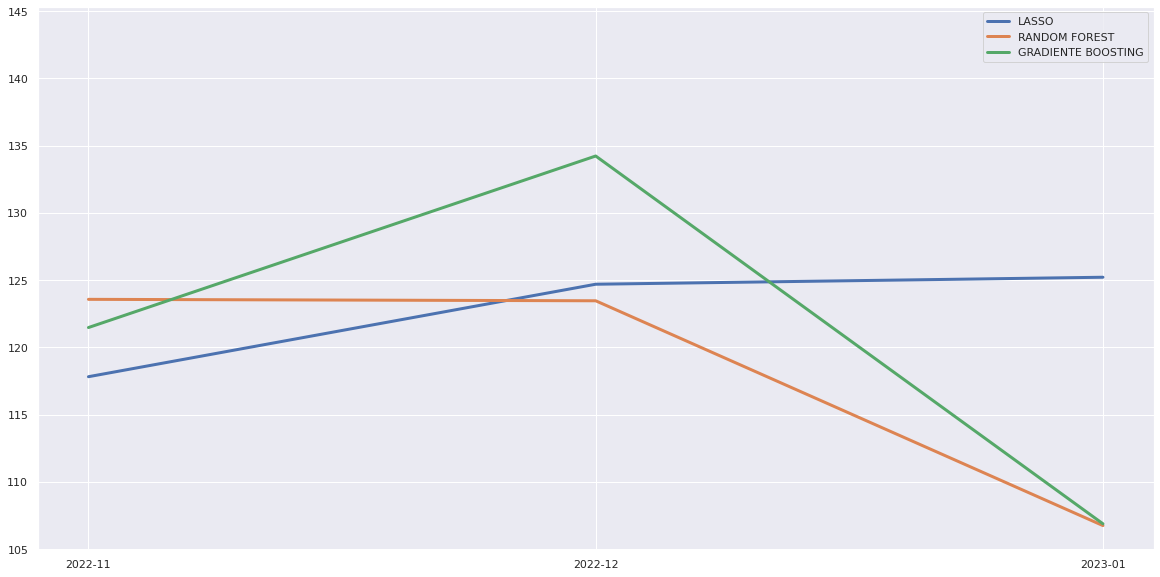

In [ ]:
plt.plot(pd.to_datetime(validacao.index).strftime("%Y-%m"),arima_lasso, label='LASSO',linewidth=3)
plt.plot(pd.to_datetime(validacao.index).strftime("%Y-%m"),arima_random, label='RANDOM FOREST',linewidth=3)
plt.plot(pd.to_datetime(validacao.index).strftime("%Y-%m"),arima_gradien, label='GRADIENTE BOOSTING',linewidth=3)
plt.plot(pd.to_datetime(validacao.index).strftime("%Y-%m"),y_validacao)
plt.legend();

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=validacao.index, y=arima_lasso, name='LASSO',marker=dict(color='red')))
fig.add_trace(go.Scatter(x=validacao.index, y=arima_random, name='RANDOM FOREST',marker=dict(color='green')))
fig.add_trace(go.Scatter(x=validacao.index, y=arima_gradien, name='GRADIENTE BOSTING',marker=dict(color='black')))
fig.update_layout(autosize=False, width=2000, height=1000)
fig.show()

##Intervalo de previsao

In [ ]:
def plotando_intervalo_cenario(predict_val,index,residuos,nomes):
  pre_int = pd.DataFrame(predict_val,index=index,columns=[str(nomes)])
  residuos= abs(np.mean(residuos))
  pre_int[str(nomes) +'_0,95_cima'] = pre_int[str(nomes)].apply(lambda x : x + (1.96*(abs(np.mean(residuos)))))
  pre_int[str(nomes) +'_0,95_abaixo'] = pre_int[str(nomes)].apply(lambda x : x - (1.96*(abs(np.mean(residuos)))))
  plt.plot(pre_int.index,pre_int[str(nomes)], label='Predição_'+str(nomes),linewidth=3)
  plt.fill_between(pre_int.index, pre_int[str(nomes)+'_0,95_cima'], pre_int[str(nomes) +'_0,95_abaixo'], color='gray', alpha=0.2)
  plt.legend()
  return pre_int

,Lasso,"Lasso_0,95_cima","Lasso_0,95_abaixo"
date,,,
2022-11,117.822922,118.962104,116.683740
2022-12,124.696551,125.835733,123.557369
2023-01,125.215982,126.355164,124.076799


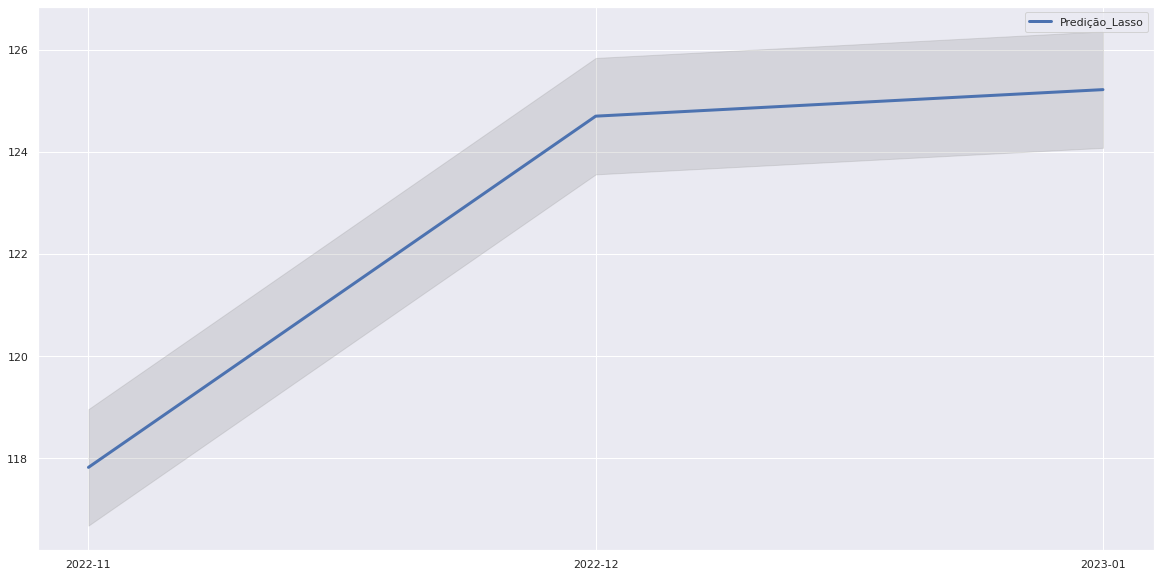

In [ ]:
plotando_intervalo_cenario(arima_lasso,predicao.index,residuo_las,'Lasso')

,random,"random_0,95_cima","random_0,95_abaixo"
date,,,
2022-11,123.573710,144.642420,102.505000
2022-12,123.466510,144.535220,102.397800
2023-01,106.756993,127.825704,85.688283


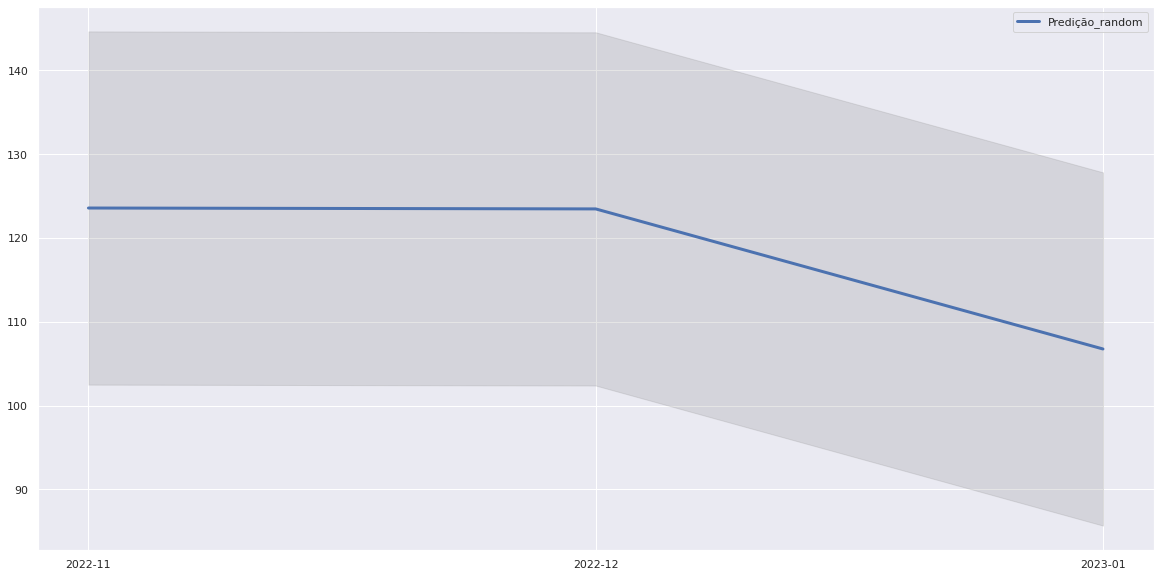

In [ ]:
plotando_intervalo_cenario(arima_random,predicao.index,residuo_ran,'random')

,Gradiente,"Gradiente_0,95_cima","Gradiente_0,95_abaixo"
date,,,
2022-11,121.476746,134.800858,108.152634
2022-12,134.227245,147.551357,120.903133
2023-01,106.889303,120.213415,93.565191


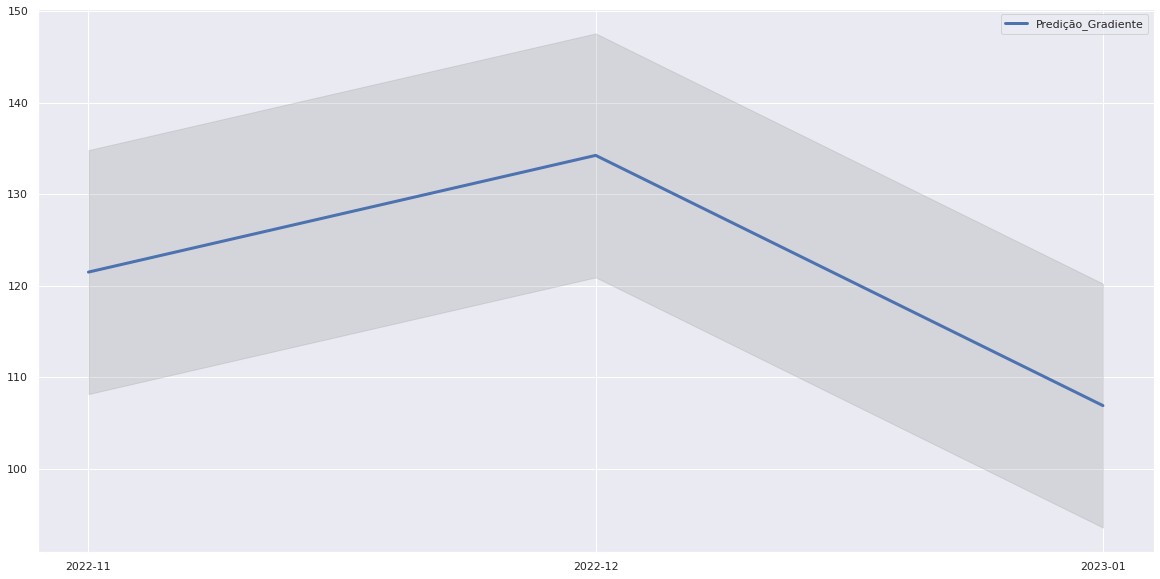

In [ ]:
plotando_intervalo_cenario(arima_gradien,predicao.index,residuo_gradiente,'Gradiente')